In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Load the dataset
df = pd.read_csv("Coimbra_breast_cancer_dataset.csv")

# Split the data into independent 'X' and dependent 'Y' variables
X = df.iloc[:, 0:9].values 
Y = df.iloc[:, 9].values

# Split the dataset into 75% Training set and 20% Testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

def models(X_train, Y_train):
    # Initialize models
    log = LogisticRegression(random_state=0)
    knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
    svc_lin = SVC(kernel='linear', random_state=0)
    svc_rbf = SVC(kernel='rbf', random_state=0)
    gauss = GaussianNB()
    tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
    forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=10)
    
    # Fit models to training data
    log.fit(X_train, Y_train)
    knn.fit(X_train, Y_train)
    svc_lin.fit(X_train, Y_train)
    svc_rbf.fit(X_train, Y_train)
    gauss.fit(X_train, Y_train)
    tree.fit(X_train, Y_train)
    forest.fit(X_train, Y_train)
    
    # Print model accuracy on the training data
    print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
    print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
    print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
    print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
    print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
    print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
    print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
    
    return log, knn, svc_lin, svc_rbf, gauss, tree, forest

# Train the models
model = models(X_train, Y_train)

# Evaluate models on the test data
for i in range(len(model)):
    cm = confusion_matrix(Y_test, model[i].predict(X_test))
    TN, TP, FN, FP = cm[0][0], cm[1][1], cm[1][0], cm[0][1]
    accuracy = (TP + TN) / (TP + TN + FN + FP)
    print(cm)
    print('Model[{}] Testing Accuracy = "{}"'.format(i, accuracy))
    print()

# Print precision, recall, F1-score, and accuracy for each model
for i in range(len(model)):
    print('Model ', i)
    print(classification_report(Y_test, model[i].predict(X_test)))
    print(accuracy_score(Y_test, model[i].predict(X_test)))
    print()

# Print predictions of Random Forest Classifier model
pred = model[6].predict(X_test)
print(pred)
print(Y_test)

C:\Users\Ayush\AppData\Local\Temp\ipykernel_7088\1086247414.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


[0]Logistic Regression Training Accuracy: 0.5546875
[1]K Nearest Neighbor Training Accuracy: 0.7040625
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.555625
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.608125
[4]Gaussian Naive Bayes Training Accuracy: 0.553125
[5]Decision Tree Classifier Training Accuracy: 1.0
[6]Random Forest Classifier Training Accuracy: 0.98875
[[  2 360]
 [  3 435]]
Model[0] Testing Accuracy = "0.54625"

[[161 201]
 [142 296]]
Model[1] Testing Accuracy = "0.57125"

[[  0 362]
 [  0 438]]
Model[2] Testing Accuracy = "0.5475"

[[ 35 327]
 [ 34 404]]
Model[3] Testing Accuracy = "0.54875"

[[ 20 342]
 [ 23 415]]
Model[4] Testing Accuracy = "0.54375"

[[162 200]
 [199 239]]
Model[5] Testing Accuracy = "0.50125"

[[191 171]
 [208 230]]
Model[6] Testing Accuracy = "0.52625"

Model  0
              precision    recall  f1-score   support

           1       0.40      0.01      0.01       362
           2       0.55      0.99      0.71

C:\Users\Ayush\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ayush\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ayush\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       362
           2       0.55      1.00      0.71       438

    accuracy                           0.55       800
   macro avg       0.27      0.50      0.35       800
weighted avg       0.30      0.55      0.39       800

0.5475

Model  3
              precision    recall  f1-score   support

           1       0.51      0.10      0.16       362
           2       0.55      0.92      0.69       438

    accuracy                           0.55       800
   macro avg       0.53      0.51      0.43       800
weighted avg       0.53      0.55      0.45       800

0.54875

Model  4
              precision    recall  f1-score   support

           1       0.47      0.06      0.10       362
           2       0.55      0.95      0.69       438

    accuracy                           0.54       800
   macro avg       0.51      0.50      0.40       800
weighted avg       0.51      0.54      

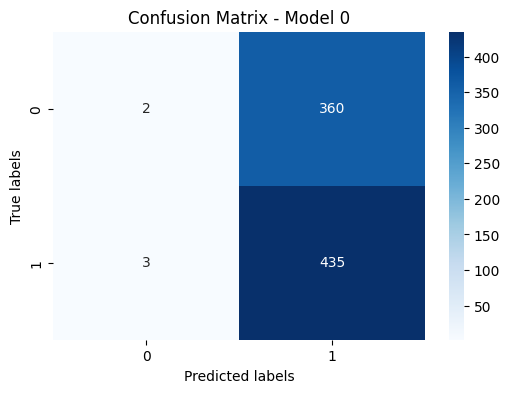

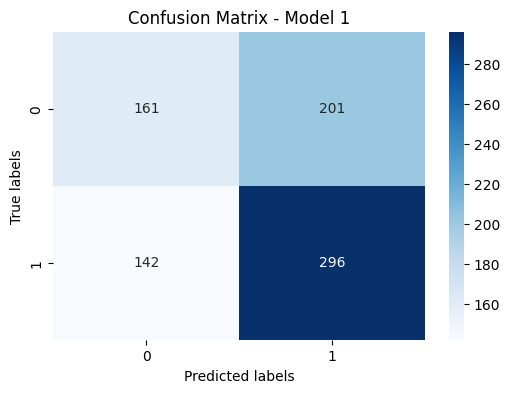

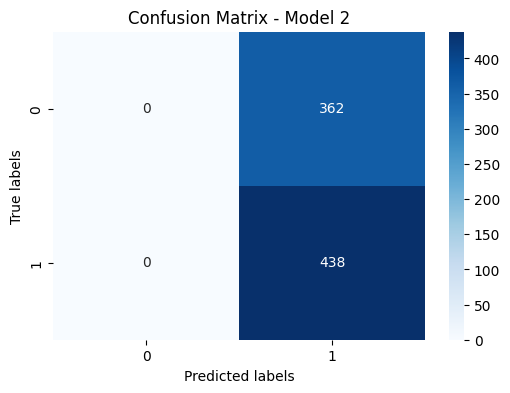

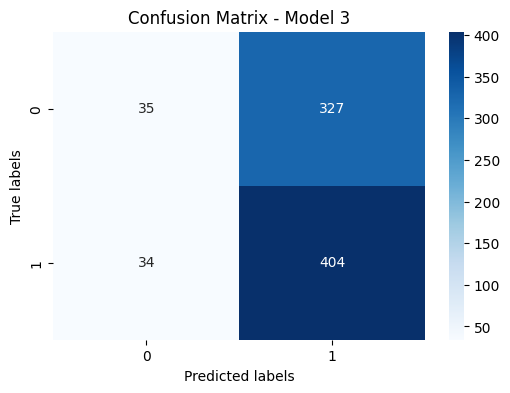

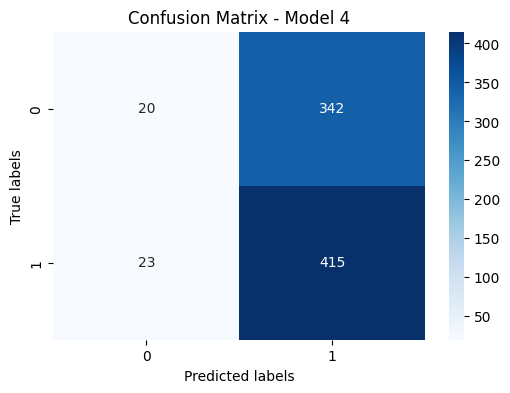

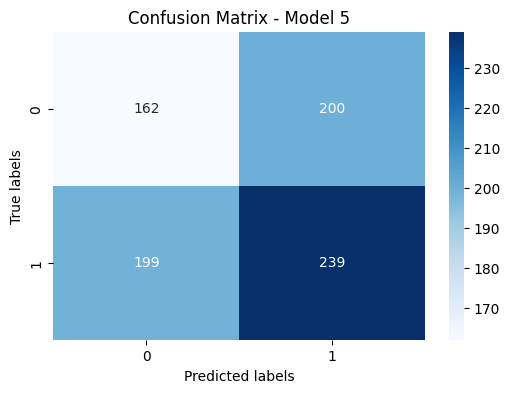

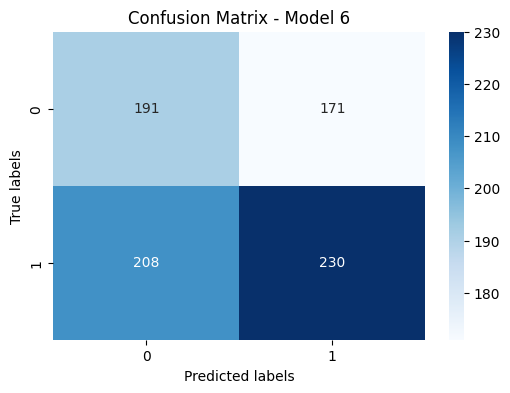

In [2]:
# Visualize confusion matrices
for i, mdl in enumerate(model):
    plt.figure(figsize=(6, 4))
    cm = confusion_matrix(Y_test, mdl.predict(X_test))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - Model {i}")
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.show()


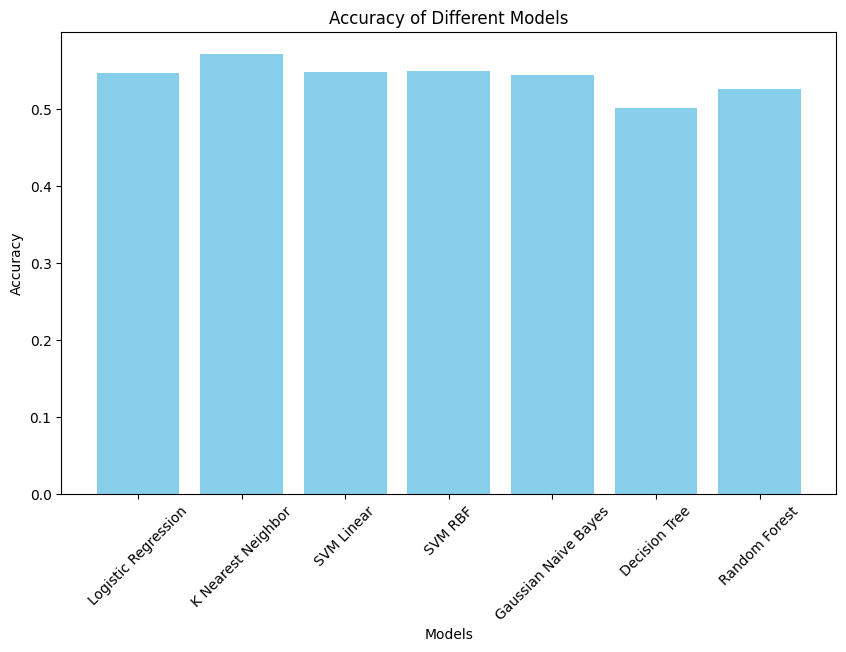

In [3]:
# Visualize accuracy scores
accuracy_scores = [accuracy_score(Y_test, mdl.predict(X_test)) for mdl in model]
models_names = ['Logistic Regression', 'K Nearest Neighbor', 'SVM Linear', 'SVM RBF', 'Gaussian Naive Bayes', 'Decision Tree', 'Random Forest']
plt.figure(figsize=(10, 6))
plt.bar(models_names, accuracy_scores, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xticks(rotation=45)
plt.show()
